In [142]:
pip install pandas numpy seaborn matplotlib plotly folium geopy scikit-learn xgboost scipy python-pptx

Note: you may need to restart the kernel to use updated packages.




**1.	Data Cleaning and Exploration**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
#from imblearn.over_sampling import SMOTE
from pptx import Presentation
from pptx.util import Inches
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from plotly.subplots import make_subplots
import plotly.io as pio



In [2]:
data = pd.read_csv('marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [5]:
data.duplicated(keep=False).sum()

np.int64(0)

In [6]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [7]:
data.columns = data.columns.str.strip()

In [8]:
data['Income'].fillna(data['Income'].median(), inplace=True)

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

/tmp/ipykernel_431/1531417861.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [9]:
data.rename(columns={' Income ': "Income"}, inplace=True)

<Axes: ylabel='Income'>

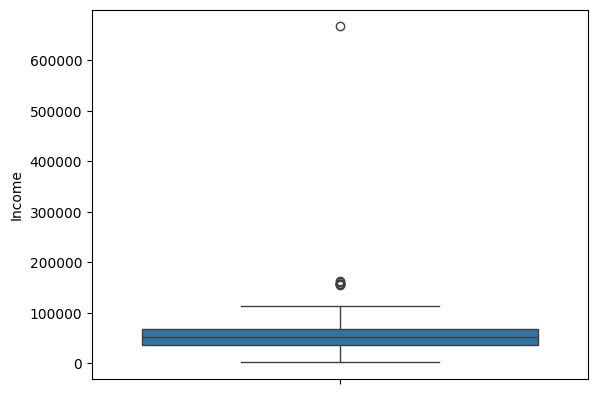

In [10]:
sns.boxplot(data=data, y='Income')

In [11]:
data[data['Income']> 200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,Saudi Arabia


In [12]:
data = data[data['Income'] < 200000]

In [13]:
#Let's  check if the columns have outliers
data[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,304.067441,26.307727,167.016525,37.538633,27.074587,44.036177,2.324252,4.085306,2.662796,5.791425,5.316213
std,336.614830,39.781468,225.743829,54.637617,41.286043,52.174700,1.932345,2.779240,2.923542,3.251149,2.427144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,504.500000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [14]:
df_to_melt = data[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [15]:
pio.renderers.default = "iframe_connected"
df_melted = df_to_melt.melt(var_name='Subject', value_name='Scores')
fig = px.box(df_melted, x='Subject', y='Scores',
             title="Box Plots for Multiple Columns",
             labels={'Subject': 'Subjects', 'Scores': 'Scores'},
             template='plotly_white')
fig.update_layout(xaxis_tickangle=60)
fig.show()

In [16]:
df_cleaned = data.copy()

**We can see there are outliers in each of the given columns, so we can remove the outliers from these group if the number of rows are less than 112 (threshold of 5% == 112 rows)**

In [17]:
cols = [ 'MntFruits', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'] 

In [18]:
df_cleaned.shape

(2239, 28)

In [19]:
df_to_melt = df_cleaned[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [20]:
df_melted = df_to_melt.melt(var_name='Subject', value_name='Scores')
fig = px.box(df_melted, x='Subject', y='Scores',
             title="Box Plots for Multiple Columns",
             labels={'Subject': 'Subjects', 'Scores': 'Scores'},
             template='plotly_white')
fig.update_layout(xaxis_tickangle=60)
fig.show()
pio.renderers.default = "iframe_connected"

In [21]:
df_cleaned[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,304.067441,26.307727,167.016525,37.538633,27.074587,44.036177,2.324252,4.085306,2.662796,5.791425,5.316213
std,336.614830,39.781468,225.743829,54.637617,41.286043,52.174700,1.932345,2.779240,2.923542,3.251149,2.427144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,504.500000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


##Now, we have to check categorical columns

In [22]:
df_cleaned['Country'].unique()

array(['Spain', 'Canada', 'USA', 'Australia', 'Germany', 'India',
       'Saudi Arabia', 'Mexico'], dtype=object)

In [23]:
df_cleaned['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [24]:
df_cleaned['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

<Axes: >

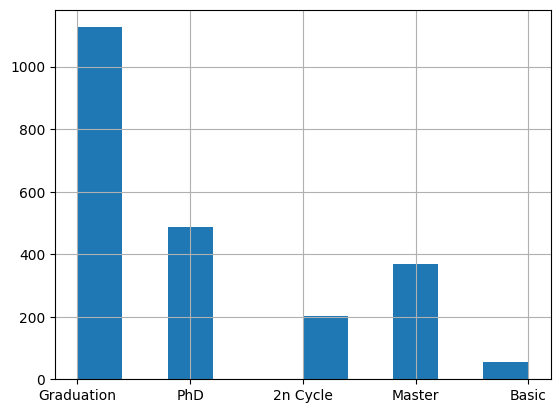

In [25]:
df_cleaned['Education'].hist()

In [26]:

def education_clean(df):

    status_mapping = {
        'Graduation': 'Graduation',
        'PhD': 'PhD',
        'Master': 'Master',
        '2n Cycle': 'Master',
        'Basic': 'High School'
    }

 
    df['Education'] = df['Education'].replace(status_mapping)
    df = df[df['Education'].isin(['Graduation', 'PhD', 'Master', 'High School'])] 

    return df

In [27]:

def clean_marital_status(df):
    
    status_mapping = {
        'Divorced': 'Divorced',
        'Single': 'Single',
        'Married': 'Married',
        'Together': 'Married', 
        'Widow': 'Single',     
        'Alone': 'Single'  
    }

   
    df['Marital_Status'] = df['Marital_Status'].replace(status_mapping)
    df = df[df['Marital_Status'].isin(['Divorced', 'Single', 'Married'])]  

    return df

<Axes: >

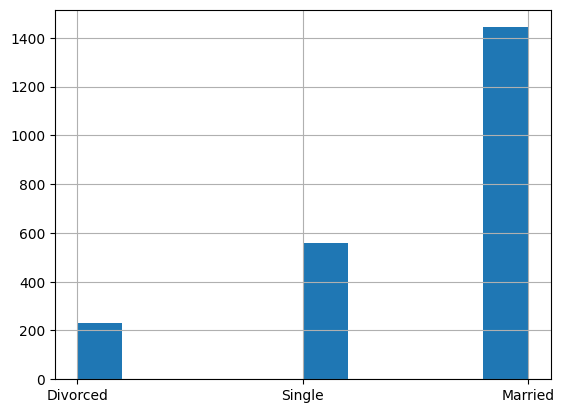

In [28]:

df_cleaned = clean_marital_status(df_cleaned)
df_cleaned["Marital_Status"].hist()

<Axes: >

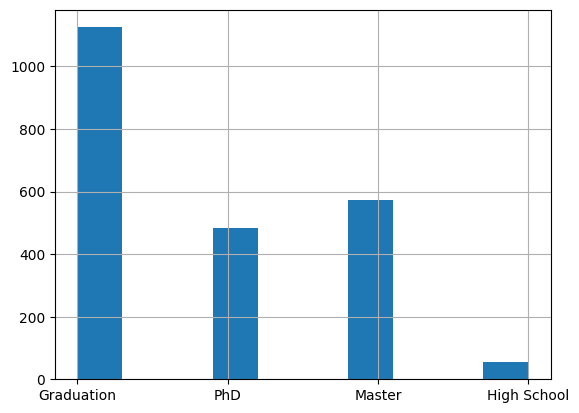

In [29]:
df_cleaned = education_clean(df_cleaned)
df_cleaned["Education"].hist()

##Now, we have cleared the **Marital_States** & **Education**

## Let's conclude what we have done in this section.


*   **Income** - we have removed the outlier and replaced the missing values with the median

*      **MntWines**, **MntFruits**,
       **MntMeatProducts**, **MntFishProducts**, **MntSweetProducts**,
       **MntGoldProds**, **NumDealsPurchases**, **NumWebPurchases**,
       **NumCatalogPurchases**, **NumStorePurchases**, **NumWebVisitsMonth** -
from these columns we removed outliers using percentile method


*   **Marital_Status** - we checked for inconsistent values and joined them into one group (Together into Married, Widow into Single and so on)
*   **Education** - we joined inconsistent values into one group (2n Cycle into Master)









#Feature Engineering

*In this section we are going to create the new columns*.

---
We have removed the outliers from  the columns and now we have to create a new
columns called **Total_spending**, and **Age** as there is no column summarizing the purchased amount for the products and column to show the age of the customer*

In [30]:
df_cleaned['Total_Spending'] = df_cleaned['MntWines'] + df_cleaned['MntFruits'] + df_cleaned['MntMeatProducts'] + df_cleaned['MntFishProducts'] + df_cleaned['MntSweetProducts'] + df_cleaned['MntGoldProds']

In [31]:
df_cleaned['Age'] = 2024 - df_cleaned['Year_Birth']
df_cleaned = df_cleaned[df_cleaned['Age']< 100]

In [32]:
df_cleaned.rename(columns={'Response':'LastCampaign'}, inplace=True)

In [33]:
df_cleaned.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'LastCampaign', 'Complain', 'Country', 'Total_Spending',
       'Age'],
      dtype='object')

In [34]:

df_cleaned['Response'] = df_cleaned['AcceptedCmp1'] + df_cleaned['AcceptedCmp2'] + df_cleaned['AcceptedCmp3'] + df_cleaned['AcceptedCmp4'] + df_cleaned['AcceptedCmp5'] + df_cleaned['LastCampaign']

In [35]:
df_cleaned.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
LastCampaign           0
Complain               0
Country                0
Total_Spending         0
Age                    0
Response               0
dtype: int64

In [36]:
dummies = pd.get_dummies(df_cleaned[['Marital_Status', 'Education', 'Country']], drop_first=False, dtype='int')
df_encoded = pd.concat([df_cleaned, dummies], axis=1)



In [37]:
df_encoded.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'LastCampaign', 'Complain', 'Country', 'Total_Spending',
       'Age', 'Response', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Education_Graduation',
       'Education_High School', 'Education_Master', 'Education_PhD',
       'Country_Australia', 'Country_Canada', 'Country_Germany',
       'Country_India', 'Country_Mexico', 'Country_Saudi Arabia',
       'Country_Spain', 'Country_USA'],
      dtype='object')

In [38]:
df_encoded['Family_Size'] = df_encoded['Kidhome'] + df_encoded['Teenhome'] + df_encoded['Marital_Status_Married'] + df_encoded['Marital_Status_Single']



In [39]:
df_encoded['Age_Income_Interaction'] = df_encoded['Age'] * df_encoded['Income']


In [40]:
df_encoded['AcceptedOffer'] = (df_encoded['Response'] > 0).astype(int)

## Let's conclude what we have done in this section.
*   **Age** - we have calculated the age of the customer, and removed the customers older than 100 years old
*   **Total_Spending** - we have calculated the total amount customer spend on purchase by combining several columns together.
*   **Response** - we have calculated the total of all the campaign together (summarized all the campaigns into one column), so it will be helpful for model building in the future. This column basically shows if the customer accepted the campaign or not (it will be our predicting .
*   **Family_Size** - we have calculated the number of people in the family, as it may affect the response rate and the money spend on purchase.
*   **Age_Income_Interaction** - this column is the multiplication of **Age** and **Income** to show how the age and income affect the response
*   **AcceptedOffer** - binary classification of the Response, which means accepteance or not the acceptance of the offer



In [41]:
df_encoded.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'LastCampaign', 'Complain', 'Country', 'Total_Spending',
       'Age', 'Response', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Education_Graduation',
       'Education_High School', 'Education_Master', 'Education_PhD',
       'Country_Australia', 'Country_Canada', 'Country_Germany',
       'Country_India', 'Country_Mexico', 'Country_Saudi Arabia',
       'Country_Spain', 'Country_USA', 'Family_Size', 'Age_Income_Interaction',
       'AcceptedOffer'],
      dtype='object')

# Noooooowww its time to Data Visualization

##Before We proceed to the step-by-step instructional performance, we would like to see where our customers come from

In [42]:
geolocator = Nominatim(user_agent="geoapi")
def get_lat_lon(country):
    try:
        location = geolocator.geocode(country)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

In [43]:
country_coords = {
    'Mexico': (23.6345, -102.5528),
    'Saudi Arabia': (23.8859, 45.0792),
    'USA': (37.0902, -95.7129),
    'Australia': (-25.2744, 133.7751),
    'Germany': (51.1657, 10.4515),
    'Canada': (56.1304, -106.3468),
    'Spain': (40.4637, -3.7492),
    'India': (20.5937, 78.9629)
}


df_encoded[['Latitude', 'Longitude']] = df_encoded['Country'].map(country_coords).apply(pd.Series)

In [44]:

m = folium.Map(location=[20, 0], zoom_start=2, width=1000,  
               height=700)  

marker_cluster = MarkerCluster().add_to(m)

Customer Demographics

In [45]:
for idx, row in df_encoded.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"ID: {row['ID']}, Age: {row['Age']}, Country: {row['Country']}"
        ).add_to(marker_cluster)
m.save("demographic_representation.html")
m

b. Visualizations to Explore Relationships

In [46]:
df_encoded.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'LastCampaign', 'Complain', 'Country', 'Total_Spending',
       'Age', 'Response', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Education_Graduation',
       'Education_High School', 'Education_Master', 'Education_PhD',
       'Country_Australia', 'Country_Canada', 'Country_Germany',
       'Country_India', 'Country_Mexico', 'Country_Saudi Arabia',
       'Country_Spain', 'Country_USA', 'Family_Size', 'Age_Income_Interaction',
       'AcceptedOffer', 'Latitude', 'Longitude'],
      dtype='object')

In [47]:

fig = px.scatter(df_encoded, x='Income', y='Total_Spending',
                 title='Spending vs. Income',
                 color='Education')
fig.update_layout(
    title={
        'text': 'Relationship between Income vs Total Spending','x': 0.5, 'xanchor': 'center' },
    width=900,height=700
)
fig.show()
pio.renderers.default = "iframe_connected"

In [48]:
pio.renderers.default = "iframe_connected"
fig = px.scatter(df_cleaned, x='Age', y='Total_Spending',
                 title='Spending vs. Income',
                 color='Education')
fig.update_layout(
    title={
        'text': 'Relationship between Total Spending vs Age',  # Title text
        'x': 0.5,  # Center alignment (x=0.5 means center, 0=left, 1=right)
        'xanchor': 'center'  # Anchor title at the center
    },
    width=900,  # Figure width
    height=650  # Figure height
)

fig.show()

Customer Analysis

In [49]:

purchase_type = ['NumCatalogPurchases', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases']
spending_by_marital = df_encoded.groupby('Marital_Status')[purchase_type].mean().reset_index()
spending_by_marital = spending_by_marital.melt(id_vars='Marital_Status',
                                               var_name='Product',
                                               value_name='Quantity')

fig = px.bar(spending_by_marital,
             x='Marital_Status',
             y='Quantity',
             color='Product',
             barmode='group',
             title='Spending Patterns by Marital Status')



In [50]:
fig.update_layout(
    title={
        'text': 'Count of Purchase Types By Marital Status',  # Title text
        'x': 0.5,  # Center alignment (x=0.5 means center, 0=left, 1=right)
        'xanchor': 'center'  # Anchor title at the center
    },
    width=900,  # Figure width
    height=700  # Figure height
)
fig.show()
pio.renderers.default = "iframe_connected"

In [51]:
spending_by_education = df_cleaned.groupby(['Education', 'Country'])['Total_Spending'].mean().reset_index()
spending_by_education = spending_by_education.sort_values(by='Total_Spending', ascending=False)
fig = px.bar(spending_by_education,
             x='Country',
             y='Total_Spending',
             color='Education',
             barmode='group',
             )
fig.update_layout(
    title={
        'text': 'Average Amount Spend By Country', 
        'x': 0.5,  
        'xanchor': 'center' },width=900,height=600)
fig.show()
pio.renderers.default = "iframe_connected"

In [52]:
spending_by_marital = df_encoded.groupby(['Education', 'Family_Size'])['Total_Spending'].mean().reset_index()
fig = px.bar(spending_by_marital,x='Education',y='Total_Spending',color='Family_Size',barmode='group',)
fig.update_layout(title={
        'text': 'Average Amount Spend By Education and Number of Children',  # Title text
        'x': 0.5,  # Center alignment (x=0.5 means center, 0=left, 1=right)
        'xanchor': 'center'  # Anchor title at the center
    },
    width=900,  # Figure width
    height=700  )
fig.show()
pio.renderers.default = "iframe_connected"

**2.	Customer Profile Analysis**

In [53]:
average_profile = {
    'Age': df_encoded['Age'].mean(),
    'Income': df_encoded['Income'].mean(),
    'Education': df_encoded['Education'].mode()[0],
    'Family Structure': {
        'Kidhome': df_encoded['Kidhome'].mean(),
        'Teenhome': df_encoded['Teenhome'].mean()
    }
}
average_profile

{'Age': np.float64(55.111111111111114),
 'Income': np.float64(51937.47759856631),
 'Education': 'Graduation',
 'Family Structure': {'Kidhome': np.float64(0.44489247311827956),
  'Teenhome': np.float64(0.5067204301075269)}}

In [54]:
spending_by_education = df_encoded.groupby(['Marital_Status'])['Total_Spending'].mean().reset_index()
fig = px.bar(spending_by_education, x='Marital_Status', y='Total_Spending',
                 title='Spending Patterns By Marital Status',
                 color='Marital_Status')
fig.update_layout(
    title={
        'text': 'Spending Patterns By Marital Status', 
        'x': 0.5,  
        'xanchor': 'center'}, width=900,  height=600  )
fig.show()
pio.renderers.default = "iframe_connected"

In [55]:
spending_by_country = df_encoded.groupby(['Country'])['Total_Spending'].mean().reset_index()
fig = px.bar(spending_by_country, x='Country', y='Total_Spending',color='Country')
fig.update_layout(
    title={
        'text': 'Spending Patterns By Country',
        'x': 0.5, 'xanchor': 'center'} ,xaxis_title='Country',  # Add x-axis label
    yaxis_title='Average Total Spending',width=900, height=700)
fig.show()
pio.renderers.default = "iframe_connected"

#3.	Marketing Campaign Performance

*a.	Which campaign was the most successful (highest acceptance rate)?*

In [56]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'LastCampaign']
campaign_acceptance_rate = df_encoded[campaign_columns].mean().reset_index()
campaign_acceptance_rate.columns = ['Campaign', 'Acceptance_Rate']
fig = px.bar(campaign_acceptance_rate, x='Campaign', y='Acceptance_Rate')
fig.update_layout(
    title={
        'text': 'Acceptance Rate by Campaign Type',  
        'x': 0.5,  
        'xanchor': 'center'},width=900, height=700 )
fig.show()
pio.renderers.default = "iframe_connected"

*b.	Analyze customer attributes (e.g., income, age, spending habits) associated with campaign acceptance.*

In [57]:
accepted_customers = df_encoded[df_encoded[campaign_columns].sum(axis=1) > 0]

In [58]:
spending_by_education = accepted_customers.groupby(['Marital_Status','Education', 'Country'])['Total_Spending'].mean().reset_index()
spending_by_education = spending_by_education.sort_values(by='Total_Spending', ascending=False)
fig = px.bar(spending_by_education,
             x='Country',
             y='Total_Spending',
             color='Marital_Status',
             barmode='group',
             )
fig.update_layout(
    title={
        'text': 'How the Customer Who Accepted Campaign Look Like',  # Title text
        'x': 0.5,  # Center alignment (x=0.5 means center, 0=left, 1=right)
        'xanchor': 'center'  # Anchor title at the center
    },
    width=900,  # Figure width
    height=700)
fig.show()
pio.renderers.default = "iframe_connected"

In [59]:
#income has positive relationship with total spending
color_scale = [
    (0, 'lightgray'),   
    (0.2, 'lightblue'),  
    (0.4, 'lightskyblue'),  
    (0.6, 'skyblue'),    
    (0.8, 'dodgerblue'),
    (1, 'darkblue') ]
fig = px.scatter(df_encoded, x='Income', y='Total_Spending',
                 title='Spending vs. Income',
                 color='AcceptedOffer',
                 color_continuous_scale=color_scale)
fig.update_layout(
    title={
        'text': 'How Amount of Money and Income Affect the Response',
        'x': 0.5,  
        'xanchor': 'center' }, width=900, height=650)
fig.show()
pio.renderers.default = "iframe_connected"

In [60]:
color_scale = [
    (0, 'lightgray'),    
    (0.2, 'lightblue'),  
    (0.4, 'lightskyblue'), 
    (0.6, 'skyblue'),   
    (0.8, 'dodgerblue'), 
    (1, 'darkblue')  ]
fig = px.scatter(df_encoded, x='Age', y='Income',
                 color='AcceptedOffer',
                 color_continuous_scale=color_scale)
fig.update_layout(
    title={
        'text': 'How Age and Income Affect the Response', 
        'x': 0.5,  
        'xanchor': 'center' },width=900, height=650 )
fig.show()
pio.renderers.default = "iframe_connected"

*c.	What factors influence the likelihood of accepting a marketing offer (use statistical or machine learning methods)?*

In [61]:
df_encoded['AcceptedOffer'] = (df_encoded['Response'] > 0).astype(int)


<Axes: >

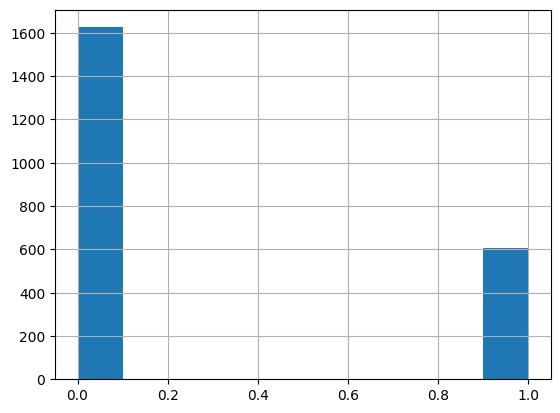

In [62]:
#the predicting column is imbalanced (we could actually balance it, but because of time limitations I just keep as it is. 
#However it is really essential to do it, to imporove the presicion which is quite low(you can see below))
df_encoded['AcceptedOffer'].hist()

In [63]:
df_encoded.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'LastCampaign', 'Complain', 'Country', 'Total_Spending',
       'Age', 'Response', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Education_Graduation',
       'Education_High School', 'Education_Master', 'Education_PhD',
       'Country_Australia', 'Country_Canada', 'Country_Germany',
       'Country_India', 'Country_Mexico', 'Country_Saudi Arabia',
       'Country_Spain', 'Country_USA', 'Family_Size', 'Age_Income_Interaction',
       'AcceptedOffer', 'Latitude', 'Longitude'],
      dtype='object')

In [64]:

df_encoded['Date'] = (df_encoded['Dt_Customer'] - df_encoded['Dt_Customer'].min()) / np.timedelta64(1, 'D')


In [65]:
df_encoded1 = df_encoded.copy()

In [66]:
df_encoded.drop(['ID', 'Year_Birth', 'Education', 'Country', 'Marital_Status', 'Dt_Customer'],axis=1, inplace=True)
df_encoded = df_encoded.astype(int)

In [67]:
df_encoded['AcceptedOffer'] = (df_encoded['Response'] > 0).astype(int)

In [68]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'LastCampaign']

y = df_encoded['AcceptedOffer']

X = df_encoded.drop(columns=campaign_columns + ['Response', 'AcceptedOffer'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)


In [69]:
X_train.dtypes

Income                     int64
Kidhome                    int64
Teenhome                   int64
Recency                    int64
MntWines                   int64
MntFruits                  int64
MntMeatProducts            int64
MntFishProducts            int64
MntSweetProducts           int64
MntGoldProds               int64
NumDealsPurchases          int64
NumWebPurchases            int64
NumCatalogPurchases        int64
NumStorePurchases          int64
NumWebVisitsMonth          int64
Complain                   int64
Total_Spending             int64
Age                        int64
Marital_Status_Divorced    int64
Marital_Status_Married     int64
Marital_Status_Single      int64
Education_Graduation       int64
Education_High School      int64
Education_Master           int64
Education_PhD              int64
Country_Australia          int64
Country_Canada             int64
Country_Germany            int64
Country_India              int64
Country_Mexico             int64
Country_Sa

In [70]:
#we need to scale number so they have equal weighs on predictibility
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight=len(y_train) / sum(y_train), random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       488
           1       0.65      0.65      0.65       182

    accuracy                           0.81       670
   macro avg       0.76      0.76      0.76       670
weighted avg       0.81      0.81      0.81       670



In [72]:
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='weight')  # 'weight' is one way to measure importance
print(importance)

{'f0': 164.0, 'f1': 17.0, 'f2': 18.0, 'f3': 194.0, 'f4': 204.0, 'f5': 122.0, 'f6': 136.0, 'f7': 132.0, 'f8': 126.0, 'f9': 227.0, 'f10': 36.0, 'f11': 79.0, 'f12': 65.0, 'f13': 111.0, 'f14': 78.0, 'f16': 123.0, 'f17': 149.0, 'f18': 7.0, 'f19': 23.0, 'f20': 24.0, 'f21': 26.0, 'f22': 1.0, 'f23': 11.0, 'f24': 18.0, 'f25': 4.0, 'f26': 6.0, 'f27': 1.0, 'f28': 2.0, 'f30': 14.0, 'f31': 29.0, 'f32': 5.0, 'f33': 24.0, 'f34': 142.0, 'f35': 32.0, 'f36': 19.0, 'f37': 218.0}


In [73]:
feature_names = X.columns  
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])
importance_df['Feature'] = importance_df['Feature'].apply(lambda x: feature_names[int(x[1:])])

importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df['Importance (%)'] = (importance_df['Importance'] / importance_df['Importance'].sum()) * 100
importance_df = importance_df.sort_values(by='Importance (%)', ascending=False)

fig = px.bar(
    importance_df,
    x='Feature',
    y='Importance (%)',
    title='Feature Importance (Percentage) for XGBoost',
    labels={'Importance (%)': 'Importance (%)'},
    template='plotly_white')
fig.update_layout(
    title={
        'text': 'Feature Importance (Percentage) that affect CAMPAIGN Acceptance', 
        'x': 0.5,  
        'xanchor': 'center'},width=1000,height=700 )

In [74]:
pio.renderers.default = "iframe_connected"
fig.show()

## Using two Machine learning model of XGBoost, we found the feature importance affecting the positive response to the acceptance of the campaign

#4.Product Performance:
##a.	Which product categories (e.g., wines, fruits, meat) generate the highest revenue?

In [75]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_revenue = df_encoded[product_columns].sum().sort_values(ascending=False)
revenue_df = pd.DataFrame({'Product Category': product_revenue.index, 'Total Revenue': product_revenue.values})
fig = px.bar(revenue_df, x='Product Category', y='Total Revenue',
             labels={'Total Revenue': 'Revenue'}, template='plotly_white', color='Product Category')
fig.update_layout(
    title={
        'text': 'Revenue by Product Category', 
        'x': 0.5,  
        'xanchor': 'center'  },width=900,  height=600)
fig.show()
pio.renderers.default = "iframe_connected"

**b. Identify customer segments driving product sales.**

In [76]:
bins = [0, 40000, 80000, df_encoded['Income'].max()]
labels = ['Low Income', 'Middle Income', 'High Income']
df_encoded['Income Bracket'] = pd.cut(df_encoded['Income'], bins=bins, labels=labels)
income_segment_spending = df_encoded.groupby('Income Bracket')[product_columns].sum().sum(axis=1).sort_values()
fig = px.bar(income_segment_spending, x=income_segment_spending.index, y=income_segment_spending.values,
            labels={'y': 'Total Spending', 'x': 'Income Bracket'},
             template='plotly_white', color=income_segment_spending.index)
fig.update_layout(
    title={
        'text': 'Total Spending by Income Bracket', 
        'x': 0.5,  
        'xanchor': 'center' },width=900,height=700 )
fig.show()
pio.renderers.default = "iframe_connected"

/tmp/ipykernel_431/3697057931.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [77]:
family_segment_spending = df_cleaned.groupby('Marital_Status')['Total_Spending'].sum().sort_values()
fig = px.bar(family_segment_spending, x=family_segment_spending.index, y=family_segment_spending.values, labels={'y': 'Total Spending', 'x': 'Family Structure'},
             template='plotly_white', color=family_segment_spending.index)
fig.update_layout(
    title={
        'text': 'Total Spending by Marital Status',  
        'x': 0.5, 
        'xanchor': 'center'},width=900,height=600)
fig.show()
pio.renderers.default = "iframe_connected"

In [78]:
education_spending = df_cleaned.groupby('Education')['Total_Spending'].sum().sort_values(ascending=False)

fig_education = px.bar(education_spending, x=education_spending.index, y=education_spending.values,
                       title='Spending by Education', labels={'y': 'Total Spending', 'x': 'Education'},
                       template='plotly_white', color=education_spending.index)
fig_education.update_layout(
    title={
        'text': 'Total Spending by Education', 
        'x': 0.5,  
        'xanchor': 'center'},width=900,  height=600 )
fig_education.show()
pio.renderers.default = "iframe_connected"

In [79]:
country_spending = df_cleaned.groupby('Country')['Total_Spending'].sum().sort_values(ascending=False)
fig_country = px.bar(country_spending, x=country_spending.index, y=country_spending.values,
                     title='Spending by Country', labels={'y': 'Total Spending', 'x': 'Country'},
                     template='plotly_white', color=country_spending.index)
fig_country.update_layout(
    title={
        'text': 'Total Spending by Country',  
        'x': 0.5,  
        'xanchor': 'center'},width=900,height=600)
fig_country.show()
pio.renderers.default = "iframe_connected"

In [80]:
df_encoded1['Age_Group'] = pd.cut(df_encoded1['Age'], bins=[18, 36, 59, df_encoded1['Age'].max()],
                                  labels=['Young', 'Middle-aged', 'Old-adults'], include_lowest=True)
age_group_spending = df_encoded1.groupby('Age_Group')['Total_Spending'].sum().sort_values(ascending=False)
fig_age = px.bar(age_group_spending, x=age_group_spending.index, y=age_group_spending.values,
                     title='Spending by Age Group', labels={'y': 'Total Spending', 'x': 'Age Group'},
                     template='plotly_white', color=age_group_spending.index)
fig_age.update_layout(
    title={
        'text': 'Total Spending by Age Groups',  # Title text
        'x': 0.5,  # Center alignment
        'xanchor': 'center'  # Anchor title at the center
    },
    width=900,  # Figure width
    height=700)
fig_age.show()
pio.renderers.default = "iframe_connected"

/tmp/ipykernel_431/81209114.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#5.	Channel Performance:

a. Evaluate the performance of marketing channels (web, store, catalog)

In [81]:
channel_columns = ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'NumDealsPurchases']
channel_performance = df_encoded1[channel_columns].sum().sort_values(ascending=False)

channel_df = pd.DataFrame({'Channel': channel_performance.index, 'Total Purchases': channel_performance.values})
fig = px.bar(channel_df, x='Channel', y='Total Purchases', title='Performance of Marketing Channels',
             labels={'Total Purchases': 'Number of Purchases', 'Channel': 'Marketing Channel'},
             template='plotly_white', color='Channel')
fig.update_layout(
    title={
        'text': 'Performance of Marketing Channels', 
        'x': 0.5,  
        'xanchor': 'center'  },width=900,  height=600)
fig.show()
pio.renderers.default = "iframe_connected"

##c.	Identify underperforming channels and suggest improvements.

###From the above given chart, we can see that Number of Catalog Purchases and Number of Discount Purchases are lower than Number of Store and Number of Web Purchases.
* Number of Discount Purchases - This might indicate, that we either have short period for discounts, or we have some problems offering discounted items. Thus, in order to increase the number of Discounted purchases, we need to extend the period for discounts and increase the number of items that will be included into discount.

* Number of Catalog Purchases - We also see that catalog purchases quiet low, so we need to create variety of catalogs and distribute them to all the potentials customers, meaning we have to distribute as much catalogs, as we can and make our catalog more attractive to customers.


In [82]:
df_encoded1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'LastCampaign', 'Complain', 'Country', 'Total_Spending',
       'Age', 'Response', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Education_Graduation',
       'Education_High School', 'Education_Master', 'Education_PhD',
       'Country_Australia', 'Country_Canada', 'Country_Germany',
       'Country_India', 'Country_Mexico', 'Country_Saudi Arabia',
       'Country_Spain', 'Country_USA', 'Family_Size', 'Age_Income_Interaction',
       'AcceptedOffer', 'Latitude', 'Longitude', 'Date', 'Age_Group'],
      dtype='o

##b. Which factors are significantly related to the number of web purchases?

###In order to understand the relationship between Number of Web Purchases and other factors, we have to create scatterplots between other factors and Number of Web Purchases to see if there is any correlation

In [83]:
features = ['Income', 'Age', 'MntWines', 'MntMeatProducts', 'MntSweetProducts', 'Total_Spending', 'Recency', 'AcceptedOffer', 'NumWebVisitsMonth']
for feature in features:
    fig = px.scatter(df_encoded1,x=feature,y='NumWebPurchases',title=f'Scatterplot of {feature} vs. NumWebPurchases',labels={'x': feature, 'y': 'Number of Web Purchases'},template='plotly_white',
        color='Age_Group',height=800, width=900)
    fig.show()
    pio.renderers.default = "iframe_connected"

In [84]:
df_encoded1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Country_Saudi Arabia,Country_Spain,Country_USA,Family_Size,Age_Income_Interaction,AcceptedOffer,Latitude,Longitude,Date,Age_Group
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,1,0,0,4581090.0,1,40.4637,-3.7492,686.0,Middle-aged
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,3596733.0,1,56.1304,-106.3468,685.0,Old-adults
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,1,2,4439622.0,0,37.0902,-95.7129,652.0,Old-adults
3,1386,1967,Graduation,Married,32474.0,1,1,2014-05-11,0,10,...,0,0,0,3,1851018.0,0,-25.2744,133.7751,650.0,Middle-aged
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,1,0,2,751590.0,1,40.4637,-3.7492,617.0,Young


In [85]:

df_encoded['Frequency'] = df_encoded['NumWebPurchases'] + df_encoded['NumStorePurchases'] + df_encoded['NumCatalogPurchases']
df_encoded['FrequencyNormalized'] = df_encoded['Frequency'] / (df_encoded1['Total_Spending'] + 1)


In [86]:
df_encoded.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'LastCampaign', 'Complain', 'Total_Spending', 'Age',
       'Response', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Education_Graduation',
       'Education_High School', 'Education_Master', 'Education_PhD',
       'Country_Australia', 'Country_Canada', 'Country_Germany',
       'Country_India', 'Country_Mexico', 'Country_Saudi Arabia',
       'Country_Spain', 'Country_USA', 'Family_Size', 'Age_Income_Interaction',
       'AcceptedOffer', 'Latitude', 'Longitude', 'Date', 'Income Bracket',
       'Frequency', 'FrequencyNormalized'],
      dtype='object')

In [87]:
df_encoded.dtypes

Income                        int64
Kidhome                       int64
Teenhome                      int64
Recency                       int64
MntWines                      int64
MntFruits                     int64
MntMeatProducts               int64
MntFishProducts               int64
MntSweetProducts              int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
AcceptedCmp3                  int64
AcceptedCmp4                  int64
AcceptedCmp5                  int64
AcceptedCmp1                  int64
AcceptedCmp2                  int64
LastCampaign                  int64
Complain                      int64
Total_Spending                int64
Age                           int64
Response                      int64
Marital_Status_Divorced       int64
Marital_Status_Married        int64
Marital_Status_Single       

#6.	Advanced Analysis and Recommendations (Clustering):

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from plotly.subplots import make_subplots

In [89]:
clustering_features = ['Income', 'Age', 'NumWebPurchases', 'NumStorePurchases',
                       'NumCatalogPurchases', 'Total_Spending', 'Family_Size', 'Recency', 'Frequency']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded[clustering_features])

In [90]:

inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
fig = px.line(x=range(2, 11), y=inertia, markers=True, title="Elbow Method for Optimal Clusters",
              labels={'x': 'Number of Clusters', 'y': 'Inertia'}, width=900, height=600)
fig.show()
pio.renderers.default = "iframe_connected"

In [91]:

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(scaled_data)

In [92]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df_encoded['PCA1'] = pca_data[:, 0]
df_encoded['PCA2'] = pca_data[:, 1]
fig = px.scatter(df_encoded, x='PCA1', y='PCA2', color='Cluster',
                 title='Customer Segments Visualization',
                 labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2'},
                 template='plotly_white', width=900, height=700)
fig.show()
pio.renderers.default = "iframe_connected"

In [93]:
features_to_summarize = ['Income', 'Age', 'Recency', 'Frequency',
                         'NumWebPurchases', 'NumStorePurchases',
                         'NumCatalogPurchases', 'Total_Spending']
cluster_summary = df_encoded.groupby('Cluster')[features_to_summarize].mean().reset_index()
cluster_summary['Num_Customers'] = df_encoded['Cluster'].value_counts().sort_index().values
cluster_summary

,Cluster,Income,Age,Recency,Frequency,NumWebPurchases,NumStorePurchases,NumCatalogPurchases,Total_Spending,Num_Customers
0,0,34589.753208,52.159921,49.285291,5.694965,2.024679,3.137216,0.533070,92.974334,1013
1,1,57893.536624,59.222930,47.812102,16.165605,6.230892,7.277070,2.657643,671.835987,628
2,2,75343.277496,55.800338,50.355330,20.423012,5.338409,8.774958,6.309645,1413.971235,591


In [94]:
cluster_colors = ['#636EFA', '#EF553B', '#00CC96'] 
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}, {'type': 'bar'}]],
                    subplot_titles=["Radar Chart (Actual Values)", "Bar Chart (Income)"])

for i in range(len(cluster_summary)):
    fig.add_trace(
        go.Scatterpolar(
            r=cluster_summary.iloc[i, 2:-2].values,
            theta=features_to_summarize,
            fill='toself',
            name=f'Cluster {cluster_summary.iloc[i, 0]}',
            line=dict(color=cluster_colors[i]),),
        row=1, col=1)
fig.add_trace(
    go.Bar(
        x=cluster_summary['Cluster'],
        y=cluster_summary['Income'],  
        name='Income',
        marker=dict(color=cluster_colors), 
    ),
    row=1, col=2
)
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True) 
    ),
    title={
        'text': "Customer Profiles: Radar Chart and Income Bar Chart",
        'x': 0.5,
        'xanchor': 'center' },width=900, height=700,showlegend=True)

In [95]:
fig.update_xaxes(title_text="Cluster", row=1, col=2)
fig.update_yaxes(title_text="Income (Average)", row=1, col=2)
fig.show()
pio.renderers.default = "iframe_connected"

In [96]:
colors = ['#636EFA', '#EF553B', '#00CC96']
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']

In [97]:
fig = make_subplots(
    rows=2, cols=2, 
    subplot_titles=["Frequency", "Num Catalog Purchases", "Total Spending", "Num Store Purchases"],
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]],
    horizontal_spacing=0.2, vertical_spacing=0.2
)

fig.add_trace(go.Bar(x=clusters, y=cluster_summary['Frequency'], name='Frequency', marker_color=colors), row=1, col=1)
fig.add_trace(go.Bar(x=clusters, y=cluster_summary['NumCatalogPurchases'], name='Num Catalog Purchases', marker_color=colors), row=1, col=2)
fig.add_trace(go.Bar(x=clusters, y=cluster_summary['Total_Spending'], name='Total Spending', marker_color=colors), row=2, col=1)
fig.add_trace(go.Bar(x=clusters, y=cluster_summary['NumStorePurchases'], name='Num Store Purchases', marker_color=colors), row=2, col=2)


In [98]:
pio.renderers.default = "iframe_connected"
fig.show()

In [99]:
fig_pie = go.Figure()
fig_pie.add_trace(go.Pie(labels=clusters, values=cluster_summary['Num_Customers'], name="Num Customers", marker=dict(colors=colors)))
fig_pie.update_layout(title_text="Pie Chart - Number of Customers per Cluster",showlegend=True)
fig_pie.show()
pio.renderers.default = "iframe_connected"

Thank you!